# LeNet-5 - Adapted

In [1]:
# importando o framework tensorflow no python
import tensorflow as tf

In [2]:
# selecionando os dados
mnist = tf.keras.datasets.mnist

In [3]:
# baixando os dados e o dividindo em treinamento e teste
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
# visualizando as dimensões dos dados
print('training image shape:', training_images.shape)
print('training label shape:', training_labels.shape)
print('test image shape:', test_images.shape)
print('training label shape:', test_labels.shape)

training image shape: (60000, 28, 28)
training label shape: (60000,)
test image shape: (10000, 28, 28)
training label shape: (10000,)


training image label: 5


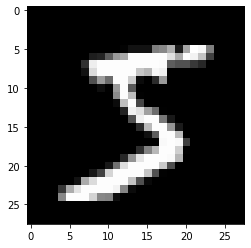

In [5]:
# visualizando o estilo dos dados
from matplotlib.pyplot import imshow
imshow(training_images[0], cmap = 'gray')
print('training image label:', training_labels[0])

In [6]:
# pegando informações dimensionais da imagem
wpixels, hpixels = training_images[0].shape
m_train = training_labels.size
m_test = test_labels.size

In [7]:
# reajustando o formato dos dados e aplicando a normalização
training_images = training_images.reshape(m_train, wpixels, hpixels, 1)
training_images = training_images / 255
test_images = test_images.reshape(m_test, wpixels, hpixels, 1)
test_images = test_images / 255

In [8]:
# definindo o moddelo de rede neural convolucional
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(filters = 6, kernel_size = (5, 5), strides = 1, activation = tf.nn.relu, input_shape = (wpixels, hpixels, 1)),
                                    tf.keras.layers.AveragePooling2D(pool_size = (2, 2), strides = 2),
                                    tf.keras.layers.Conv2D(filters = 16, kernel_size = (5, 5), strides = 1, activation = tf.nn.relu),
                                    tf.keras.layers.MaxPooling2D(pool_size = (2, 2), strides = 2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(120, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(84, activation = tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

In [9]:
# definindo os detalhes da compilação do modelo
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               30840     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [11]:
# treinando a rede neural convolucional
model.fit(training_images, training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 31s 15ms/step - loss: 0.4368 - accuracy: 0.8651
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0645 - accuracy: 0.9790
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0338 - accuracy: 0.9894
Epoch 5/5
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0289 - accuracy: 0.99080s - loss: 0.0289 - accu


In [12]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 7ms/step - loss: 0.0347 - accuracy: 0.9886


[0.03465503081679344, 0.9886000156402588]